# 1. Install and Import Dependencies

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
!cd yolov5 & pip install -r requirements.txt

     -------------------------------------- 190.6/190.6 kB 1.7 MB/s eta 0:00:00
  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl (38.1 MB)
     -------------------------------------- 663.2/663.2 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB 3.3 MB/s eta 0:00:00


In [17]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [18]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\qofret/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-2-25 Python-3.10.13 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [19]:
#loading the pre-trained model from pytorch

In [20]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [8]:
# an image from the  internet
img = "WhatsApp Görsel 2023-12-25 saat 12.11.25_16e7fe5f.jpg"
#img = "https://cst.brightspotcdn.com/dims4/default/48f1932/2147483647/strip/false/crop/3000x1999+0+0/resize/1486x990!/quality/90/?url=https%3A%2F%2Fcdn.vox-cdn.com%2Fthumbor%2FOOe1ZWZhayDWn8-ySplaELWkCHQ%3D%2F0x0%3A3000x1999%2F3000x1999%2Ffilters%3Afocal%281832x1370%3A1833x1371%29%2Fcdn.vox-cdn.com%2Fuploads%2Fchorus_asset%2Ffile%2F24353661%2Fmerlin_110773064.jpg"

In [9]:
results = model(img)
results.print()

image 1/1: 1536x2048 22 persons, 1 handbag, 1 suitcase, 2 bottles, 1 cup, 1 chair, 1 laptop, 1 remote, 1 cell phone, 1 clock
Speed: 91.2ms pre-process, 177.1ms inference, 235.3ms NMS per image at shape (1, 3, 480, 640)


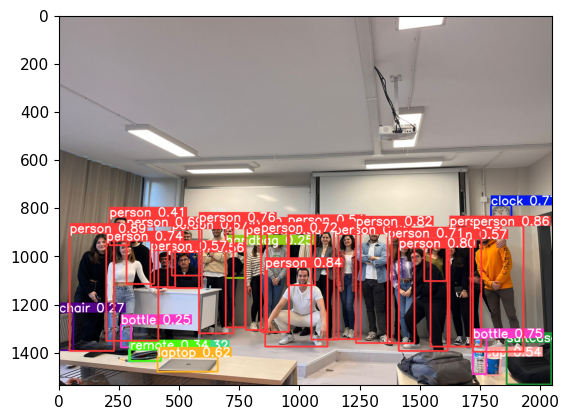

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
results.render()

[array([[[154, 148, 150],
         [151, 145, 147],
         [151, 145, 147],
         ...,
         [147, 136, 134],
         [147, 136, 134],
         [147, 136, 134]],
 
        [[155, 149, 151],
         [152, 146, 148],
         [152, 146, 148],
         ...,
         [145, 134, 132],
         [145, 134, 132],
         [145, 134, 132]],
 
        [[155, 149, 151],
         [153, 147, 149],
         [153, 147, 149],
         ...,
         [145, 134, 132],
         [145, 134, 132],
         [145, 134, 132]],
 
        ...,
 
        [[ 21,  20,  18],
         [ 24,  23,  21],
         [ 28,  27,  25],
         ...,
         [ 26, 147,  52],
         [ 26, 147,  52],
         [ 26, 147,  52]],
 
        [[ 21,  20,  18],
         [ 25,  24,  22],
         [ 30,  29,  27],
         ...,
         [ 26, 147,  52],
         [ 26, 147,  52],
         [ 24, 125,  46]],
 
        [[ 21,  20,  18],
         [ 25,  24,  22],
         [ 29,  28,  26],
         ...,
         [ 26, 147,  52],
  

# 4. Real Time Detections

In [12]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [13]:
#ON ANY VIDEO
cap = cv2.VideoCapture("bombay traffic.mp4")
#cap = cv2.VideoCapture("taksim.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [5]:
import uuid   # Unique identifier
import os
import time

In [32]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [33]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [34]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.6b7f68f2-a675-11ee-b145-9c2f9d4ec28e.jpg


In [35]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.6d97c6c3-a675-11ee-af48-9c2f9d4ec28e.jpg
data\images\awake.6d97c6c4-a675-11ee-9560-9c2f9d4ec28e.jpg
data\images\awake.6d97c6c5-a675-11ee-893c-9c2f9d4ec28e.jpg
data\images\awake.6d97c6c6-a675-11ee-9d45-9c2f9d4ec28e.jpg
data\images\awake.6d97c6c7-a675-11ee-adcc-9c2f9d4ec28e.jpg
data\images\awake.6d97f6f4-a675-11ee-9a2b-9c2f9d4ec28e.jpg
data\images\awake.6d97f6f5-a675-11ee-881b-9c2f9d4ec28e.jpg
data\images\awake.6d97f6f6-a675-11ee-a5eb-9c2f9d4ec28e.jpg
data\images\awake.6d97f6f7-a675-11ee-9d73-9c2f9d4ec28e.jpg
data\images\awake.6d97f6f8-a675-11ee-80c4-9c2f9d4ec28e.jpg
data\images\awake.6d97f6f9-a675-11ee-b3f1-9c2f9d4ec28e.jpg
data\images\awake.6d97f6fa-a675-11ee-8394-9c2f9d4ec28e.jpg
data\images\awake.6d97f6fb-a675-11ee-a770-9c2f9d4ec28e.jpg
data\images\awake.6d97f6fc-a675-11ee-8d33-9c2f9d4ec28e.jpg
data\images\awake.6d97f6fd-a675-11ee-a473-9c2f9d4ec28e.jpg
data\images\awake.6d97f6fe-a675-11ee-b05b-9c2f9d4ec28e.jpg
data\images\awake.6d97f6ff-a675-11ee-bb99-9c2f9d4ec28e.j

In [25]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [36]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [54]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data C:\Users\qofret\Jupyter\YOLO-Drowsiness-Detection-main\yolov5\dataset.yml --weights C:\Users\qofret\Jupyter\YOLO-Drowsiness-Detection-main\yolov5\yolov5s.pt --workers 2

train: weights=C:\Users\qofret\Jupyter\YOLO-Drowsiness-Detection-main\yolov5\yolov5s.pt, cfg=, data=C:\Users\qofret\Jupyter\YOLO-Drowsiness-Detection-main\yolov5\dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-254-gba63208 Python-3.10.13 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8

# 6. Load Custom Model

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid   # Unique identifier
import os
import time

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp17/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\qofret/.cache\torch\hub\master.zip
YOLOv5  2025-2-26 Python-3.10.13 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [3]:
# img = os.path.join('data', 'images', 'awake.3a902247-a675-11ee-b6b1-9c2f9d4ec28e.jpg')
img = os.path.join('sleepyman.jpg')

In [4]:
results = model(img)

In [5]:
results.print()

image 1/1: 534x800 2 drowsys
Speed: 56.0ms pre-process, 178.8ms inference, 234.4ms NMS per image at shape (1, 3, 448, 640)


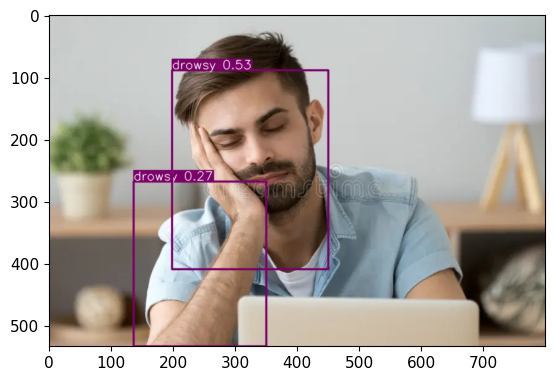

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [16]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()